In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = load_iris()
X = data.data[:, [2,3]]
y = data.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_valid_std = std.transform(X_valid)
X_valid_std = std.transform(X_valid)

X_combined_std = np.vstack([X_train_std, X_valid_std])
y_combined = np.hstack([y_train, y_valid])

In [33]:
def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    unique_y = np.unique(y)
    cmap = ListedColormap(colors[:len(unique_y)])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(unique_y) :
        plt.scatter(X[y==cl, 0],
                 X[y==cl, 1],
                 alpha=0.8,
                 c=colors[idx],
                 marker=markers[idx],
                 label = cl,
                 edgecolor='black')

    if test_idx:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0],
                 X_test[:, 1],
                 alpha=1.0,
                 marker='o',
                 c='',
                 s=100,
                 linewidths=1,
                 label='test set',
                 edgecolor='black')


<ipython-input-33-b597c3d2b647>:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


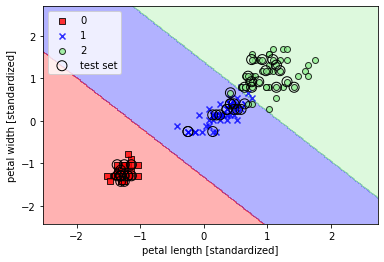

In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

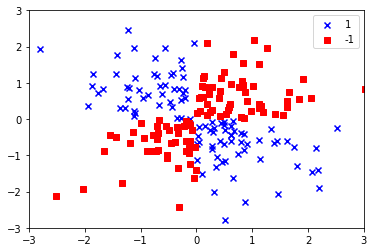

In [35]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1]> 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

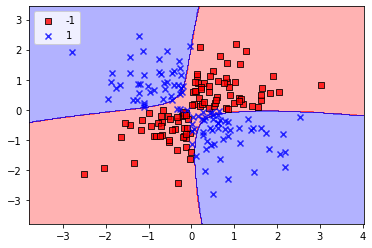

In [37]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_region(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

<ipython-input-33-b597c3d2b647>:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


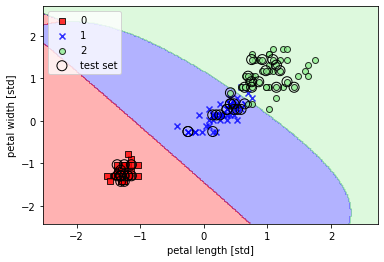

<ipython-input-33-b597c3d2b647>:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


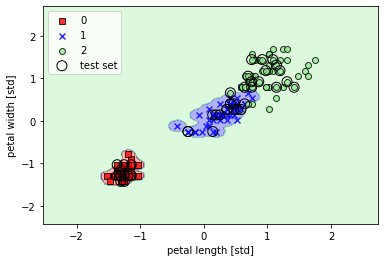

In [39]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()


In [41]:
indices = tuple(range(5))
from itertools import combinations
for p in combinations(indices, 4):
    print(p)

(0, 1, 2, 3)
(0, 1, 2, 4)
(0, 1, 3, 4)
(0, 2, 3, 4)
(1, 2, 3, 4)
